# Projet Statistiques Grandes dimensions (Sparcité et Détection de Rupture)

<h1 align="center">Essaddek Othmane</h1> 

<h1 align="center">Boukhari Yassine</h1> 

## Partie I : Différentes méthodes de seuillage

On suppose que l'on observe $y_1,...,y_n$ vérifiant le modèle de suite gaussienne :$$y_j=a\eta_j+\epsilon_j;\quad j=1,...,d$$
avec $a\in \mathbb{R}$ et $\eta_j\in{0,1}$ qui sont des paramètres inconnus tels que $$\sum_{j=1}^d=[d^{1-\beta}]\quad\text{pour un}\;\beta\in(0,1)$$
Où les variables aléatoires $\epsilon$ sont i.i.d de loi $\mathcal{N}(0,1)$
On se fixe dans la suite $d=50$ et $\beta=0.3$ et a variant de 1 à 10. on pose le seuil $\tau=\sqrt{2log(d)}$.
On note $\theta*=a.(\eta_1,...,\eta_d)^T$, afin d'estimer $\theta*$ on considera par la suite trois type d'estimateur $\textit{l'estimateur fort}$ $\hat{\theta}^H$, $\textit{l'estimateur par seuillage faible}$ $\hat{\theta}^S$ et l'estimateur dit $\textit{'non-negative garrotte'}$ $\hat{\theta}^{NG}$ definis de la manière suivante :
\begin{eqnarray*}
\hat{\theta}^H&=y_jI(\vert y_j\vert>\tau)\\
\hat{\theta}^S&=y_j.(1-\frac{\tau}{\vert y_j\vert})_{+}\\
\hat{\theta}^S&=y_j.(1-\frac{\tau^2}{\vert y_j^2\vert})_{+}
\end{eqnarray*}
pour tout $j\in{1,...,d}$ où $(a)_+=max\{0,a\}$

### Importation de nos librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import time
%matplotlib inline
%matplotlib inline
from math import *
from numpy.random import *
from numpy.linalg import *
from scipy.misc import *
from random import randrange



### Question 1 (Tracée des différents seuillages)

On commence par tracer nos différents seuillages $\hat{\theta}^H$,$\hat{\theta}^S$ et $\hat{\theta}^{NG}$ 

15


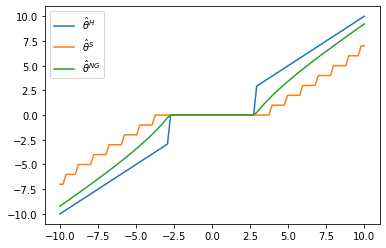

In [2]:
d=50

to=np.sqrt(2*np.log(d))

beta=0.3

#a_=np.linspace(1,10,50)
a=2
I=int(d**(1-beta))
print(I)

eta_=np.zeros(50)


def y(a):
    j=0
    eta_1=np.zeros(d)
    n=0
    while(n<I):
        j=randrange(d)
        if(eta_1[j]!=1):
            eta_1[j]=1
            n=n+1
    theta=a*eta_1
    y_=np.array([T+np.random.normal(0,1) for T in theta])  #theta+np.random.normal(0,1,d)
    return([y_,theta])



#print(y(10)[0])




def thetaH(y,j):
    if(np.abs(y)>to):
        return(y)
    else:
        return(0)
    
    
def thetaS(y,j):
    x=max(0,1-to/(np.abs(y)))
    return(int(x*y))

def thetaNG(y,j):
    x=max(0,1-to**2/(np.abs(y))**2)
    return(x*y)


y_1=np.linspace(-10,10,100)#theta+np.random.normal(0,1,d)
tH=np.array([thetaH(y_1[i],0) for i in range(100)])
tS=np.array([thetaS(y_1[i],0) for i in range(100)])
tNG=np.array([thetaNG(y_1[i],0) for i in range(100)])
plt.plot(y_1,tH,label="$\hat{\\theta}^H$")
plt.plot(y_1,tS,label="$\hat{\\theta}^S$")
plt.plot(y_1,tNG,label="$\hat{\\theta}^{NG}$")
plt.legend()

### Vérification de la sparcité de nos données

In [3]:
T=y(2)[1]
e=np.array([t+np.random.normal(0,1) for t in T])
            
tt=np.array([thetaH(j,0) for j in e])

print(tt)
print(T)
print((T-tt)**2)
print(np.sum((T-tt)**2))

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         2.97757669 0.
 0.         0.         0.         0.         3.39636544 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         3.11877713 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 2.94417476 0.         0.         0.         0.         0.
 0.         0.        ]
[2. 2. 0. 0. 2. 2. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 0. 2.
 0. 0. 0. 0. 0. 2. 0. 2. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0. 0. 0. 2. 0.
 0. 0.]
[4.         4.         0.         0.         4.         4.
 0.         0.         0.         4.         0.95565618 0.
 0.         0.         0.         0.         1.94983644 4.
 0.         0.         0.         0.         0.         4.
 0.         0.         0.         0.         0.         4.
 0.         1.25166226 0.         4.         0.        

### Question 2 Estimation du risque quadratique des différents seuillages  

On note $R(\hat{\theta},a)=\vert\vert\hat{\theta}-\theta^*\vert\vert^2_2$ le risque quadratique de l'estimateur $\hat{\theta}$.
On représente graphiquement les différents risques pour a variant de $1$ à $10$. En premier lieu on a calculé le risque quadratique de manière $\textit{'naive'}$ et pour avoir une meilleure idée sur l'erreur on a calculé l'erreur moyenne commise après n simulations

(50,)


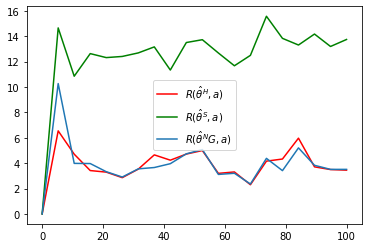

In [19]:
print(np.shape((y(0.5))[1]))
a_=[0,1,2,3,4,5,6,7,8,9]

a__=np.linspace(0,100,20)

SH=np.zeros(20)
SS=np.zeros(20)
Sgn=np.zeros(20)

for i in range(20):
    (Y,T)=y(a__[i])

    tH=np.array([thetaH(j,0) for j in Y])
    tS=np.array([thetaS(j,0)for j in Y])
    tGN=np.array([thetaNG(j,0)for j in Y])   

    e=np.array([t+np.random.normal(0,1) for t in T])
            
    tt=np.array([thetaH(j,0) for j in Y])
    
    SH[i]=np.sum((T-tt)**2)#np.sqrt(s)
    SS[i]=np.sum((T-tS)**2)#np.sqrt(ss)
    Sgn[i]=np.sum((T-tGN)**2)#np.sqrt(sgn)
plt.plot(a__,np.sqrt(SH),'red',label='$R(\hat{\\theta}^H,a)$')
plt.plot(a__,np.sqrt(SS),'green',label='$R(\hat{\\theta}^S,a)$')
plt.plot(a__,np.sqrt(Sgn),label='$R(\hat{\\theta}^NG,a)$')
plt.legend()

(50,)


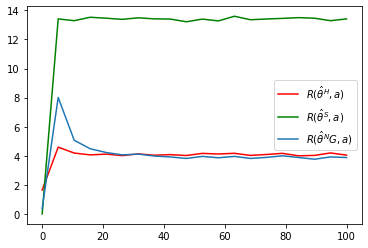

In [20]:
print(np.shape((y(0.5))[1]))
a_=[0,1,2,3,4,5,6,7,8,9]

a__=np.linspace(0,100,20)

SH=np.zeros(20)
SS=np.zeros(20)
Sgn=np.zeros(20)

for i in range(20):
    lH=np.zeros(100)
    lS=np.zeros(100)
    lGn=np.zeros(100)
    for k in range(100):
        (Y,T)=y(a__[i])

        tH=np.array([thetaH(j,0) for j in Y])
        tS=np.array([thetaS(j,0)for j in Y])
        tGN=np.array([thetaNG(j,0)for j in Y])   

        e=np.array([t+np.random.normal(0,1) for t in T])

        tt=np.array([thetaH(j,0) for j in Y])

        lH[k]=np.sum((T-tt)**2)#np.sqrt(s)
        lS[k]=np.sum((T-tS)**2)#np.sqrt(ss)
        lGn[k]=np.sum((T-tGN)**2)#np.sqrt(sgn)
    SH[i]=np.mean(lH)
    SS[i]=np.mean(lS)
    Sgn[i]=np.mean(lGn)
    
plt.plot(a__,np.sqrt(SH),'red',label='$R(\hat{\\theta}^H,a)$')
plt.plot(a__,np.sqrt(SS),'green',label='$R(\hat{\\theta}^S,a)$')
plt.plot(a__,np.sqrt(Sgn),label='$R(\hat{\\theta}^NG,a)$')
plt.legend()

### Question 3 : Sélection des coordonnées non nulles de $\theta^*$ et étude du risque  $R^{MS}$

Pour cette dernière question on s'intéresse à déterminer les ccordonnées non nulles de notre $\theta^*$ selon le seuillage dur et on étudiera le risque de sélection de variables donnée par $R^{MS}(\hat{\theta},a)=\sum_{j=1}^M\vert\eta_j-\hat{\eta_j}\vert$ on suivera la même méthodologie que la partie précédente pour calculer le risque et la moyenne des riques.

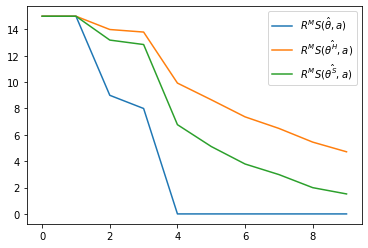

In [21]:
def yt(a):
    j=0
    eta_1=np.zeros(d)
    n=0
    while(n<I):
        j=randrange(d)
        if(eta_1[j]!=1):
            eta_1[j]=1
            n=n+1
    theta=a*eta_1
    y_=theta+np.random.normal(0,1,d)
    return([y_,eta_1])

Rsm=[]
Rsmd=[]
Rsms=[]
for a in a_:
    ind=[]
    indd=[]
    eta_hat=np.zeros(d)
    eta_hatd=np.zeros(d)
    eta_hats=np.zeros(d)
    (Y,eta)=yt(a)
#     eta=yt(a)[1]
    for i in range(d):
        eta_hat[i]=int((Y[i]>to) )
        eta_hatd[i]=max(0,1-to/np.abs(Y[i]))
        eta_hats[i]=max(0,1-to**2/(np.abs(Y[i]))**2)
    for k in range(d):
        if(eta_hat[k]==1):
            ind.append(k)
    s=0
    sd=0
    ss=0
#     print(ind)
    for j in range(d):
        s=s+np.abs(eta[j]-eta_hat[j])
        sd=sd+np.abs(eta[j]-eta_hatd[j])
        ss=ss+np.abs(eta[j]-eta_hats[j])
    Rsm.append(s)
    Rsmd.append(sd)
    Rsms.append(ss)

            
plt.plot(a_,Rsm,label='$R^MS(\hat{\\theta},a)$')
plt.plot(a_,Rsmd,label='$R^MS(\hat{\\theta^H},a)$')
plt.plot(a_,Rsms,label='$R^MS(\hat{\\theta^S},a)$')
plt.legend()

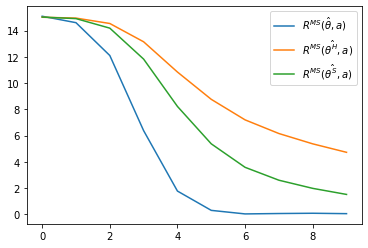

In [6]:
def yt(a):   # fonction qui prend a en argument et  renvoie un échantillon et le eta avec quoi il a etait construit 
    j=0
    eta_1=np.zeros(d)
    n=0
    while(n<I):
        j=randrange(d)
        if(eta_1[j]!=1):
            eta_1[j]=1
            n=n+1
    theta=a*eta_1
    y_=theta+np.random.normal(0,1,d)
    return([y_,eta_1])

Rsm=[]
Rsmd=[]
Rsms=[]
for a in a_:  #boucle sur les a
    lH=np.zeros(100)       #
    lS=np.zeros(100)       # initialisation du compteur d'erreurs pour les 3 type de suillage
    lGn=np.zeros(100)      #
    
    for j in range(100):
        eta_hat=np.zeros(d)
        eta_hatd=np.zeros(d)
        eta_hats=np.zeros(d)
        (Y,eta)=yt(a)
        
        for i in range(d):
            eta_hat[i]=int((Y[i]>to) )
            eta_hatd[i]=max(0,1-to/np.abs(Y[i]))
            eta_hats[i]=max(0,1-to**2/(np.abs(Y[i]))**2)
        s=0
        sd=0
        ss=0
        
        for k in range(d):
            s=s+np.abs(eta[k]-eta_hat[k])
            sd=sd+np.abs(eta[k]-eta_hatd[k])
            ss=ss+np.abs(eta[k]-eta_hats[k])
            
        lH[j]=s
        lS[j]=sd
        lGn[j]=ss
            
    Rsm.append(np.mean(lH))
    Rsmd.append(np.mean(lS))
    Rsms.append(np.mean(lGn))

            
plt.plot(a_,Rsm,label='$R^{MS}(\hat{\\theta},a)$')
plt.plot(a_,Rsmd,label='$R^{MS}(\hat{\\theta^H},a)$')
plt.plot(a_,Rsms,label='$R^{MS}(\hat{\\theta^S},a)$')
plt.legend()

## Partie II : Détéction de rupture

Supposons que l'on observe $y_1,...,y_d$ vérifiant le modèle de suite gaussienne 
$$y_j=\theta_j^*+\epsilon.\xi_j;\quad j=1,...,d$$
avec $\epsilon=1/\sqrt{d}$, $\theta^*=( \theta^*_1,..., \theta^*_d)^T$ est tel que : 
   $\left\{
   \begin{aligned}
      \theta_j^* &= 3 \;\text{pour} j\in\{1,...,10\}\\   
      \theta_j^* &= 7 \;\text{pour} j\in\{11,...,30\}\\
      \theta_j^* &= 1,5 \;\text{pour} j\in\{31,...,40\}\\
      \theta_j^* &= 2 \;\text{pour} j\in\{41,...,d\}
   \end{aligned}.
   \right.$

Les variables aléatoires $\xi_j$ sont i.i.d de loi $\mathcal{N}(0,1)$. On fixe $d=50$. Pour ce qui va suivre on propose une méthode pour détecter les instants de ruptures dans le vecteur $\theta^*$.
On commence tout d'abords par simuler nos différents $y_j$ chose qui fera apparaitre nos différents saut et ainsi nos ruptures. 

Pour la partie graphique on s'intéressera au graphe lié à la fonction \Delta qu'on définira pour tout $j\in J={2,...,d},$ $\;\Delta_j= Y_{j+1}-Y{j}$  

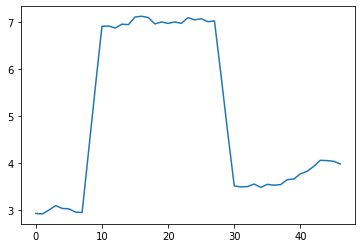

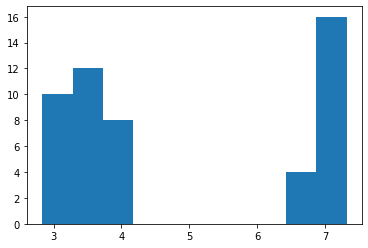

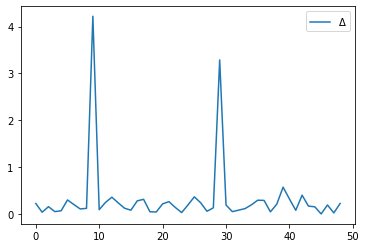

[10, 30, 40, 43]
[2.25525567e-01 3.87949288e-02 1.57354384e-01 5.21119811e-02
 7.01443130e-02 3.00810918e-01 2.03702373e-01 1.08850927e-01
 1.21851954e-01 4.22018709e+00 9.31715940e-02 2.49638213e-01
 3.59617056e-01 2.38124736e-01 1.24493247e-01 8.21561003e-02
 2.81414696e-01 3.14838933e-01 4.87177390e-02 4.38693593e-02
 2.17311538e-01 2.64768669e-01 1.40829155e-01 3.16184601e-02
 1.94067631e-01 3.66904733e-01 2.41283294e-01 5.91237679e-02
 1.33147447e-01 3.28813160e+00 1.92880739e-01 5.14144796e-02
 8.39515432e-02 1.15982493e-01 1.96402123e-01 2.95368404e-01
 2.91400561e-01 4.75713422e-02 2.09250007e-01 5.73714146e-01
 3.22381757e-01 7.98106447e-02 4.02300914e-01 1.69720318e-01
 1.54979284e-01 2.96647649e-03 1.93357614e-01 2.40970495e-02
 2.26386444e-01]
[2.96647649e-03 2.40970495e-02 3.16184601e-02 3.87949288e-02
 4.38693593e-02 4.75713422e-02 4.87177390e-02 5.14144796e-02
 5.21119811e-02 5.91237679e-02 7.01443130e-02 7.98106447e-02
 8.21561003e-02 8.39515432e-02 9.31715940e-02 1.088

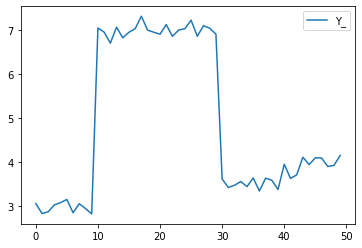

In [22]:
theta=np.zeros(d)
theta[0:10]=3
theta[10:30]=7
theta[30:40]=3.5
theta[40:d]=4



def echs(n): # fonction qui renvoie  une matrice dont la i-ème ligne est le vecteur delta associé a  l'échantillon Yi
    D=np.zeros((n,d-1))
    for i in range(n):
        Y_=theta+1/np.sqrt(d)*np.random.normal(0,1,d)
        D[i,:]=np.array([np.abs((Y_[j+1]-Y_[j])/1) for j in range(d-1)])
    return(D)



Y_=theta+1/np.sqrt(d)*np.random.normal(0,1,d)
theta_hat=np.array([thetaH(Y_[i],0) for i in range(d)])

#Création d'une fonction mean appliquée au vecteur Y
def moy(Y,nb):
    return([np.mean(Y[k:k+nb])for k in range(len(Y)-nb)])

#Plot selon les différentes valeur moyenne de Y
plt.plot([k for k in range(d-3)],moy(Y_,3))
plt.show()
plt.hist(Y_,bins=10)
plt.show()
Delta=np.array([np.abs((Y_[j+1]-Y_[j])/1) for j in range(d-1)])

#Fixation du seuil :
pos=[]
for i in range(len(Delta)):
    if(Delta[i]>0.38):
        pos.append(i+1)
#Plot des différences Delta_j=Y_{j+1}-Y{j}
plt.plot(Delta,label="$\\Delta$")
plt.legend()
plt.show()
plt.plot(Y_,label="Y_")
plt.legend()
print(pos)
print(Delta)
Delta.sort()
print(Delta)

On met en lumière dans ce qui va suivre la méthode pour détecter nos différentes ruptures en premier temps et les extraires par la suite.  

In [23]:
Ds=echs(1000)
pos=[] # Initialisation des positions
Dm=[]
for j in range(d-1):
    Dm.append(np.mean(Ds[:,j]))
    


for i in range(len(Dm)):
    if(Dm[i]>0.5):
        pos.append(i+1)
print(pos)


[10, 30]


## Fenêtre de Test collection des données grâce à une API pour les donées réelles

In [24]:
# from bs4 import BeautifulSoup
# import csv
# from urllib.request import urlopen

# basicurl = 'http://webcancer.invs.sante.fr/mortalite_8408/print.php?return_url=%2Fmortalite_8408%2Fdonnees_localisation%2Fevolution%2Flocal.php%3Flocalisation%3DL{location}&data=tab_CI_02_GR_L{location}_S{gender}'
# locationlist = ["0" + str(i) for i in range(1,10)] + [str(i) for i in range(10,27)] + ["99"]
# validchars = ' abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'


# def souptocsv(basicurl, validchars, location, gender):
#     try:
#         soup = BeautifulSoup(urlopen(basicurl.format(location=location,gender=gender)))
#         tables = soup.findAll('table') #cherche les tableaux dans la page
#         table1 = tables[0]
#         table2 = tables[1]
#         rows = []
#         for row in table1.find_all('tr'): #tr et td marquent les séparations
#             rows.append([val.text for val in row.find_all('td')])

#         title = gender + "".join([c for c in rows[1][0] if c in validchars])
#         headers = [header.text for header in table2.find_all('th')]

#         rows = []
#         for row in table2.find_all('tr'):
#             rows.append([val.text.encode('utf8') for val in row.find_all('td')])
#         folder = 'Mortalite/'
        
#         with open(folder + title + '.csv', 'w', newline='') as f:
#             writer = csv.writer(f)
#             writer.writerow(headers)
#             writer.writerows(row for row in rows if row)
#     print(writer)
#     except:
#         print(location + gender)

# for i in locationlist:
#     souptocsv(basicurl, validchars, i, "1")
#     souptocsv(basicurl, validchars, i, "2")
    
    
# print(table1)

## Partie III : Etudes sur données réelles

Pour cette partie on implémentera la méthode utilisé dans la partie 2 sur des données relatives au domaine automobile comme le montre le data frame impélmenté ci-dessous. 

In [25]:
import pandas as pd
import os

os.getcwd()
os.chdir('C:\\Users\\USER INFO\Desktop\json')

df_automobile = pd.read_csv("Automobile_data.csv") 

In [26]:
df_automobile

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


Notre Data frame contient 205 lignes pour 26 colonnes et comme le montre le graphe qui suit la donnée liée au $\textit{"while base"}$ est la plus proche à ce qu'on cherche afin de détecter les ruptures comme le montre le graphe 

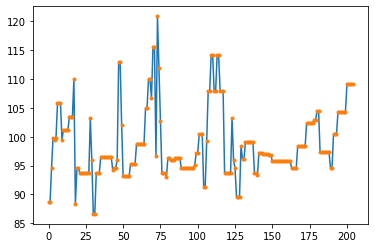

In [27]:
wb=df_automobile['wheel-base']
plt.plot(wb)
plt.plot(wb,".")

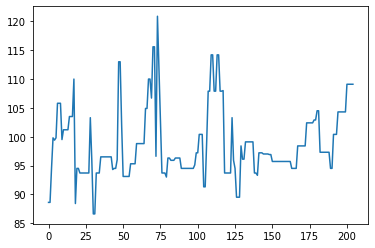

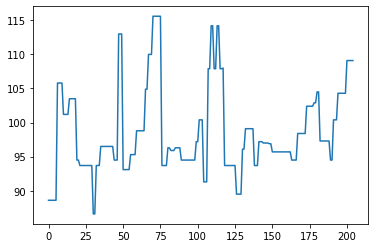

points de ruptures sont:
[2, 3, 4, 5, 9, 17, 18, 28, 29, 43, 46, 49, 69, 72, 73, 74, 75, 79, 98, 106, 123, 124, 125, 129, 140, 5, 9, 13, 18, 20, 29, 31, 34, 43, 46, 49, 54, 58, 64, 66, 69, 75, 79, 81, 84, 88, 98, 100, 103, 106, 108, 110, 112, 114, 116, 117, 125, 129, 131, 137, 140, 143, 147, 149, 162, 166, 172, 177, 179, 181, 188, 190, 193, 199]
74


In [52]:
wb=df_automobile['wheel-base'].tolist()

x=np.linspace(0,200,len(wb))

#Fonction qui enlève les points singuliers c'est à dire les points éloignés de leurs voisins des deux côtés 
#Et qui renvoie un vecteur identique au vecteur d'entrée sauf pour les points singuliers ainsi que la position
#Des points singuliers
def nettoyage(v,to):
    lst_net=[]
    lst_pos=[]
    t=v.copy()
    for i in range(1,len(v)-1):
        if ((abs (t[i]-t[i-1])>to) & (abs(t[i]-t[i+1])>to)):
            lst_net.append(t[i])
            lst_pos.append(i)
            t[i]=t[i-1]
    
    v_new=t#[x for x in v if x!=-1]
    return(v_new,lst_pos)





#Implémentation de la détection de la rupture
(v,pos1)=nettoyage(wb,0.1)

#Affichage du nettoyage

plt.plot(wb)
plt.show()
plt.plot(v)
plt.show()


#On définit delta comme étant un vecteur collectionnant la différence entre les points successifs  
#dans le cas de notre base c'est soit 0 soit un nombre strictement supérieur à 0

Delta=[abs(v[j+1]-v[j]) for j in range(len(v)-1)]

pos2=np.array([i for i in range(len(Delta)) if Delta[i]!=0 ])

#Points de rupture

print("points de ruptures sont:")
print(pos1+pos2.tolist())
print(len(pos1+pos2.tolist()))

### Utilisation de la bibliothèque Ruptures pour détection les points de ruptures à l'aide de fonctions prédéfinies

In [30]:
# !pip install ruptures

In [61]:
import matplotlib.pyplot as plt
import ruptures as rpt
wb=df_automobile['wheel-base']
model = rpt.Dynp(model="l1")
y = np.array(wb.tolist())
model.fit(y)
breaks = model.predict(n_bkps=40-1)

breaks
pos=nettoyage(y,0.005)[1]
print(breaks)

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 190, 195, 200, 205]
